# **Analisis TukuPos 2024**


## Analisis Deret Waktu

In [1]:
pip install pmdarima

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 28.6 MB/s eta 0:00:00


In [2]:
import pandas as pd

In [3]:
data = pd.read_excel("Data transaksi dan stok.xlsx")

In [4]:
data

,ID,Tanggal,Trans ID,Konsumen,Nama Produk,Kategori,Qty
0,3088.0,2024-01-30 23:25:00,TR-240130-2,1012,11237.0,1217.0,2.0
1,3089.0,2024-01-30 23:25:00,TR-240130-2,1012,11304.0,1217.0,1.0
2,3090.0,2024-01-30 23:25:00,TR-240130-2,1012,11234.0,1217.0,1.0
3,3091.0,2024-01-30 23:31:00,TR-240130-3,1013,12182.0,1228.0,10.0
4,3092.0,2024-01-30 23:33:00,TR-240130-4,1014,9669.0,1207.0,1.0
...,...,...,...,...,...,...,...
19308,23240.0,2024-09-18 17:02:00,TR-240918-54,9995,12247.0,1208.0,5.0
19309,23241.0,2024-09-18 17:16:00,TR-240918-55,9996,11411.0,1217.0,1.0
19310,23242.0,2024-09-18 17:16:00,TR-240918-55,9996,11388.0,1217.0,5.0
19311,23243.0,2024-09-18 17:16:00,TR-240918-55,9996,11386.0,1217.0,6.0


### EDA (Exploratory Data Analysis) & Preprocessing

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19313 entries, 0 to 19312
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   ID           19303 non-null  float64       
 1   Tanggal      19313 non-null  datetime64[ns]
 2   Trans ID     19313 non-null  object        
 3   Konsumen     19313 non-null  int64         
 4   Nama Produk  19303 non-null  float64       
 5   Kategori     19303 non-null  float64       
 6   Qty          19303 non-null  float64       
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 1.0+ MB


In [6]:
# Convert 'Tanggal' to datetime
data['Tanggal'] = pd.to_datetime(data['Tanggal'])

In [7]:
# Convert 'Nama Produk' to string
data['Nama Produk'] = data['Nama Produk'].astype(str)

In [8]:
# Check for missing values
missing_data = data.isnull().sum()
print(missing_data)

# If necessary, drop missing values
data = data.dropna()

ID             10
Tanggal         0
Trans ID        0
Konsumen        0
Nama Produk     0
Kategori       10
Qty            10
dtype: int64


In [9]:
# Check for duplicate rows
duplicates = data.duplicated()
print(duplicates.sum())

# Remove duplicates if necessary
data = data.drop_duplicates()


0


In [10]:
# Memecah kolom tanggal menjadi komponen
data['year'] = data['Tanggal'].dt.year
data['month'] = data['Tanggal'].dt.month
data['day'] = data['Tanggal'].dt.day_name()
data['hour'] = data['Tanggal'].dt.hour
data['minute'] = data['Tanggal'].dt.minute
data['second'] = data['Tanggal'].dt.second

In [11]:
data.head()

,ID,Tanggal,Trans ID,Konsumen,Nama Produk,Kategori,Qty,year,month,day,hour,minute,second
0,3088.0,2024-01-30 23:25:00,TR-240130-2,1012,11237.0,1217.0,2.0,2024,1,Tuesday,23,25,0
1,3089.0,2024-01-30 23:25:00,TR-240130-2,1012,11304.0,1217.0,1.0,2024,1,Tuesday,23,25,0
2,3090.0,2024-01-30 23:25:00,TR-240130-2,1012,11234.0,1217.0,1.0,2024,1,Tuesday,23,25,0
3,3091.0,2024-01-30 23:31:00,TR-240130-3,1013,12182.0,1228.0,10.0,2024,1,Tuesday,23,31,0
4,3092.0,2024-01-30 23:33:00,TR-240130-4,1014,9669.0,1207.0,1.0,2024,1,Tuesday,23,33,0


In [12]:
# Agregasi total penjualan harian
data_daily_sales = data.groupby(data['Tanggal'].dt.date)['Qty'].sum().reset_index()

# Rename columns
data_daily_sales.columns = ['Tanggal', 'Total Penjualan']

# Tampilkan hasil
print(data_daily_sales)

        Tanggal  Total Penjualan
0    2024-01-30             25.0
1    2024-01-31            227.0
2    2024-02-01            152.0
3    2024-02-02            194.0
4    2024-02-03            118.0
..          ...              ...
212  2024-09-14            301.0
213  2024-09-15             68.0
214  2024-09-16            378.0
215  2024-09-17            114.0
216  2024-09-18            250.0

[217 rows x 2 columns]


In [13]:
data_daily_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217 entries, 0 to 216
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Tanggal          217 non-null    object 
 1   Total Penjualan  217 non-null    float64
dtypes: float64(1), object(1)
memory usage: 3.5+ KB


In [14]:
data.describe()

,ID,Tanggal,Konsumen,Kategori,Qty,year,month,hour,minute,second
count,19303.000000,19303,19303.000000,19303.000000,19303.000000,19303.0,19303.000000,19303.000000,19303.000000,19303.0
mean,13213.163550,2024-06-04 03:52:29.429622272,5575.202818,1219.058955,2.747449,2024.0,5.617469,11.967725,29.091022,0.0
min,3088.000000,2024-01-30 23:25:00,1012.000000,1207.000000,1.000000,2024.0,1.000000,7.000000,0.000000,0.0
25%,8144.500000,2024-04-06 13:38:30,3384.500000,1211.000000,1.000000,2024.0,4.000000,10.000000,14.000000,0.0
50%,13286.000000,2024-06-08 15:41:00,5647.000000,1217.000000,1.000000,2024.0,6.000000,12.000000,29.000000,0.0
75%,18258.500000,2024-07-31 01:25:30,7761.500000,1225.000000,2.000000,2024.0,7.000000,14.000000,44.000000,0.0
max,23244.000000,2024-09-18 17:31:00,9997.000000,1321.000000,1000.000000,2024.0,9.000000,23.000000,59.000000,0.0
std,5824.122308,NaN,2580.102140,14.002980,13.908563,0.0,2.187125,2.850967,17.588115,0.0


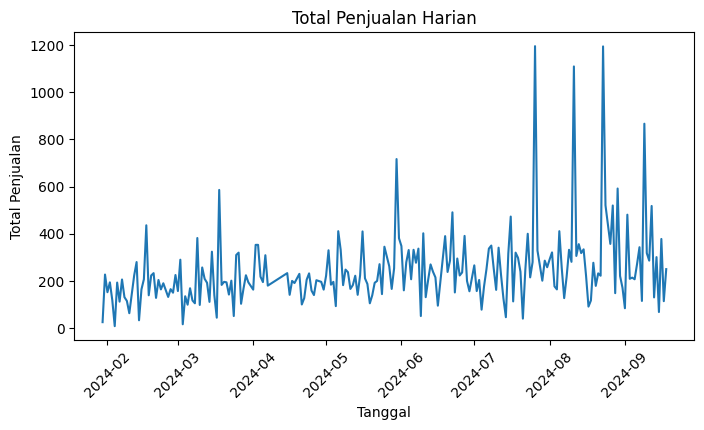

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot total penjualan harian
plt.figure(figsize=(8,4))
sns.lineplot(x='Tanggal', y='Total Penjualan', data=data_daily_sales)
plt.title('Total Penjualan Harian')
plt.xticks(rotation=45)
plt.show()


In [16]:
# Pertama, kita perlu memastikan kolom 'Tanggal' diubah menjadi tipe datetime jika belum
data['Tanggal'] = pd.to_datetime(data['Tanggal'])

# Hitung total penjualan per bulan, hari, dan jam
total_sales = data.groupby(['month', 'day', 'hour'])['Qty'].sum().reset_index()

# Temukan total penjualan terbanyak
max_sales = total_sales.loc[total_sales['Qty'].idxmax()]

# Tampilkan hasil
print("Total Penjualan Terbanyak:")
print(f"Bulan: {max_sales['month']}, Hari: {max_sales['day']}, Jam: {max_sales['hour']}, Total Penjualan: {max_sales['Qty']}")


Total Penjualan Terbanyak:
Bulan: 8, Hari: Friday, Jam: 9, Total Penjualan: 1185.0


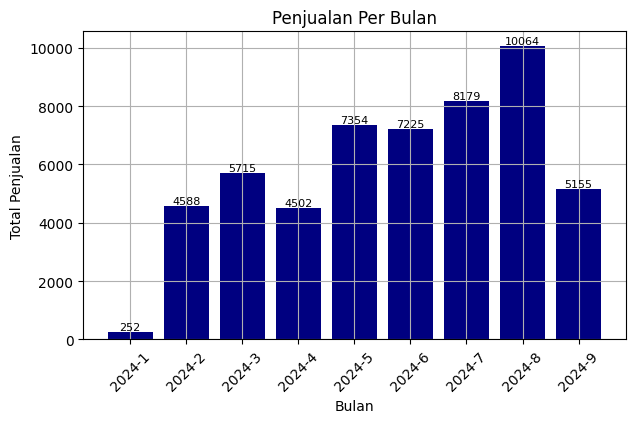

In [17]:
# Group by year and month to get monthly sales
monthly_sales = data.groupby(['year', 'month'])['Qty'].sum().reset_index()

# Membuat kolom 'Bulan' dengan format "YYYY-MM"
monthly_sales['Bulan'] = monthly_sales['year'].astype(str) + '-' + monthly_sales['month'].astype(str)

# Visualisasi menggunakan bar chart
plt.figure(figsize=(7, 4))
plt.bar(monthly_sales['Bulan'], monthly_sales['Qty'], color='navy')

# Tambahkan nilai pada setiap batang
for i, v in enumerate(monthly_sales['Qty']):
    plt.text(i, v, int(v), ha='center', va='bottom', fontsize=8)

plt.title('Penjualan Per Bulan')
plt.xlabel('Bulan')
plt.ylabel('Total Penjualan')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()



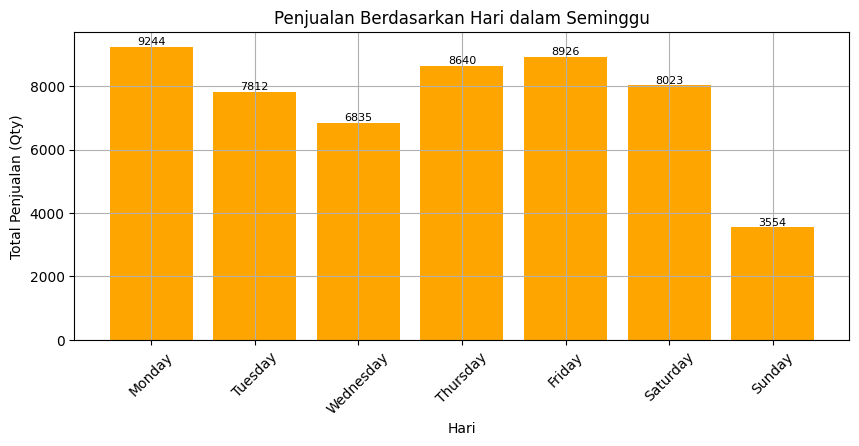

In [18]:
# Group by 'Hari' untuk menghitung total penjualan berdasarkan hari
weekly_sales = data.groupby('day')['Qty'].sum().reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday',
                                                         'Friday', 'Saturday', 'Sunday']).reset_index()

# Visualisasi penjualan berdasarkan hari
plt.figure(figsize=(10, 4))
plt.bar(weekly_sales['day'], weekly_sales['Qty'], color='orange')

# Tambahkan label pada setiap batang
for i, v in enumerate(weekly_sales['Qty']):
    plt.text(i, v, int(v), ha='center', va='bottom', fontsize=8)

plt.title('Penjualan Berdasarkan Hari dalam Seminggu')
plt.xlabel('Hari')
plt.ylabel('Total Penjualan (Qty)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()



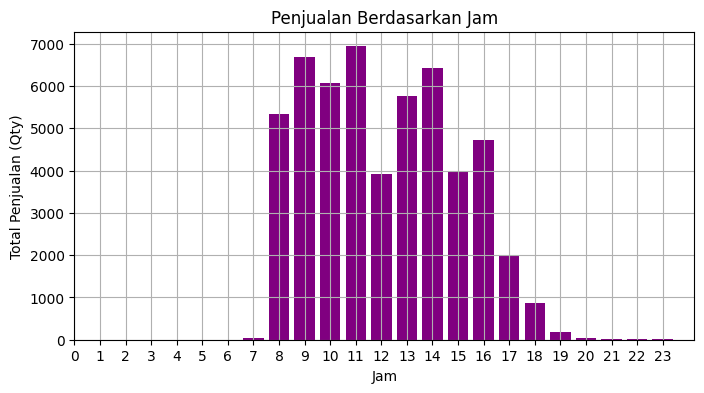

In [19]:
# Group by 'Jam' untuk menghitung total penjualan per jam
hourly_sales = data.groupby('hour')['Qty'].sum().reset_index()

# Visualisasi penjualan per jam
plt.figure(figsize=(8, 4))
plt.bar(hourly_sales['hour'], hourly_sales['Qty'], color='purple')
plt.title('Penjualan Berdasarkan Jam')
plt.xlabel('Jam')
plt.ylabel('Total Penjualan (Qty)')
plt.xticks(range(0, 24))
plt.grid(True)
plt.show()

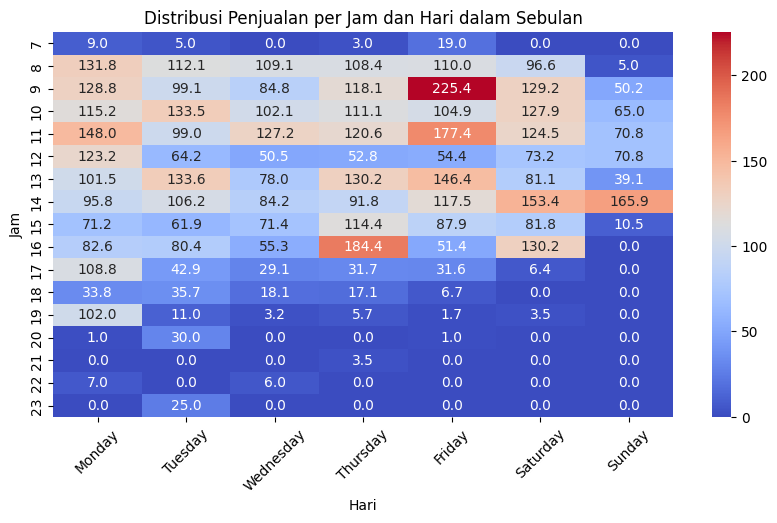

In [20]:
# Group by 'Bulan', 'Hari', dan 'Jam' untuk menghitung total penjualan
sales_grouped = data.groupby(['month', 'day', 'hour'])['Qty'].sum().reset_index()

# Pivot data untuk membuat matriks dengan 'Hari' di sumbu X, 'Jam' di sumbu Y
sales_pivot = sales_grouped.pivot_table(index='hour', columns='day', values='Qty', fill_value=0)

# Tentukan urutan hari dari Senin ke Minggu
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
sales_pivot = sales_pivot[day_order]  # Mengatur urutan kolom sesuai dengan day_order

# Buat heatmap
plt.figure(figsize=(10, 5))
sns.heatmap(sales_pivot, cmap='coolwarm', annot=True, fmt=".1f")
plt.title('Distribusi Penjualan per Jam dan Hari dalam Sebulan')
plt.xlabel('Hari')
plt.ylabel('Jam')
plt.xticks(rotation=45)
plt.show()

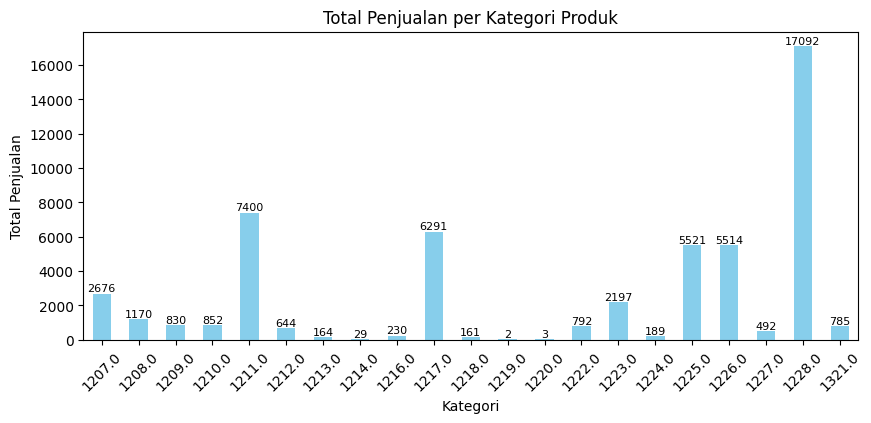

In [21]:
# Total penjualan per kategori
sales_by_category = data.groupby('Kategori')['Qty'].sum()

# Bar chart
sales_by_category.plot(kind='bar', figsize=(10, 4), color='skyblue')

# Tambahkan label pada setiap batang
for i, v in enumerate(sales_by_category):
    plt.text(i, v, int(v), ha='center', va='bottom', fontsize=8)

plt.title('Total Penjualan per Kategori Produk')
plt.xlabel('Kategori')
plt.ylabel('Total Penjualan')
plt.xticks(rotation=45)
plt.show()


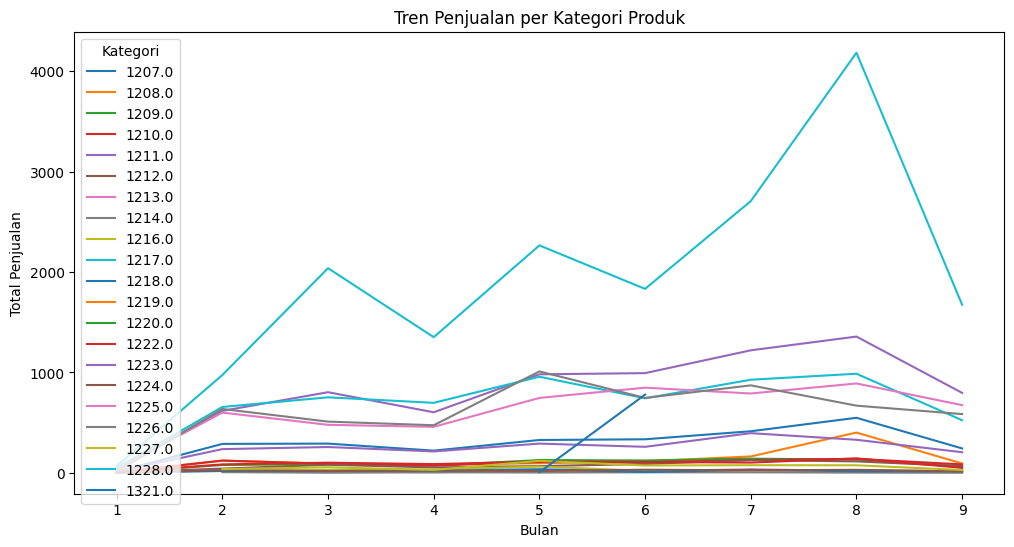

In [22]:
# Group by month and category
monthly_sales = data.groupby(['month', 'Kategori'])['Qty'].sum().unstack()

# Line chart
monthly_sales.plot(kind='line', figsize=(12, 6))
plt.title('Tren Penjualan per Kategori Produk')
plt.xlabel('Bulan')
plt.ylabel('Total Penjualan')
plt.legend(title='Kategori')
plt.show()


In [23]:
# Filter produk dalam kategori 1228
products_in_category_1228 = data[data['Kategori'] == 1228]

# Tampilkan kolom yang relevan
result = products_in_category_1228[['Nama Produk', 'Qty']]
print(result)

      Nama Produk   Qty
3         12182.0  10.0
29        12096.0   1.0
43        12146.0   5.0
44        12129.0  10.0
52        12181.0   5.0
...           ...   ...
19260     12075.0   4.0
19261     12077.0   2.0
19267     12142.0   1.0
19268     12145.0   1.0
19272     12070.0   1.0

[1487 rows x 2 columns]


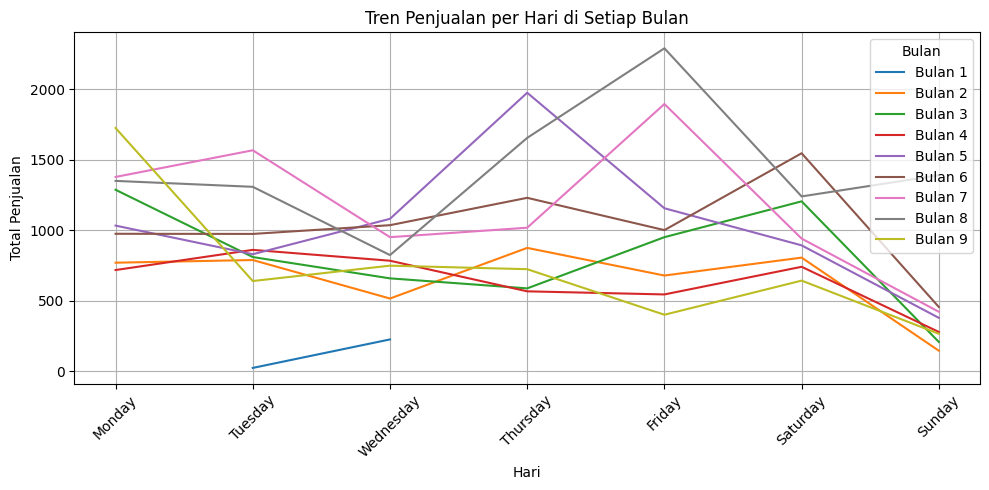

In [24]:
# Group by day and month
monthly_daily_sales = data.groupby(['month', 'day'])['Qty'].sum().unstack()

# Tentukan urutan hari dari Senin ke Minggu
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
day_mapping = {1: 'Monday', 2: 'Tuesday', 3: 'Wednesday', 4: 'Thursday', 5: 'Friday', 6: 'Saturday', 7: 'Sunday'}

# Ubah index menjadi kategori berdasarkan urutan yang ditentukan
monthly_daily_sales.columns = pd.Categorical(monthly_daily_sales.columns, categories=day_order, ordered=True)

# Sort index berdasarkan kategori hari
monthly_daily_sales = monthly_daily_sales.sort_index(axis=1)

# Plot
plt.figure(figsize=(10, 5))
for month in monthly_daily_sales.index:
    plt.plot(monthly_daily_sales.columns, monthly_daily_sales.loc[month], label=f'Bulan {month}')

plt.title('Tren Penjualan per Hari di Setiap Bulan')
plt.xlabel('Hari')
plt.ylabel('Total Penjualan')
plt.xticks(rotation=45)  # Rotate x labels for better visibility
plt.legend(title='Bulan')
plt.grid()  # Optional: add a grid for better readability
plt.tight_layout()  # To ensure layout is neat
plt.show()

In [25]:
# Hitung jumlah transaksi per konsumen
transaction_counts = data['Konsumen'].value_counts().reset_index()
transaction_counts.columns = ['Konsumen', 'Jumlah_Transaksi']

# Ambil 10 konsumen teratas berdasarkan jumlah transaksi
top_consumers = transaction_counts.head(10)

# Tampilkan hasil
print("10 Konsumen Teratas Berdasarkan Jumlah Transaksi:")
print(top_consumers)



10 Konsumen Teratas Berdasarkan Jumlah Transaksi:
   Konsumen  Jumlah_Transaksi
0      9677                32
1      7571                30
2      4367                28
3      6179                25
4      8020                23
5      5316                21
6      9657                20
7      2842                19
8      1035                19
9      5799                18


### Cek Stasioner

In [26]:
from statsmodels.tsa.stattools import adfuller

# ADF Test for stationarity
result = adfuller(data_daily_sales['Total Penjualan'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])


ADF Statistic: -6.678089076180782
p-value: 4.412711842531713e-09


Nilai ADF dan p-value kecil artinya data ini sudah stasioner

### ACF dan PACF

In [27]:
data_daily_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217 entries, 0 to 216
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Tanggal          217 non-null    object 
 1   Total Penjualan  217 non-null    float64
dtypes: float64(1), object(1)
memory usage: 3.5+ KB


In [29]:
print(data_daily_sales)

        Tanggal  Total Penjualan
0    2024-01-30             25.0
1    2024-01-31            227.0
2    2024-02-01            152.0
3    2024-02-02            194.0
4    2024-02-03            118.0
..          ...              ...
212  2024-09-14            301.0
213  2024-09-15             68.0
214  2024-09-16            378.0
215  2024-09-17            114.0
216  2024-09-18            250.0

[217 rows x 2 columns]


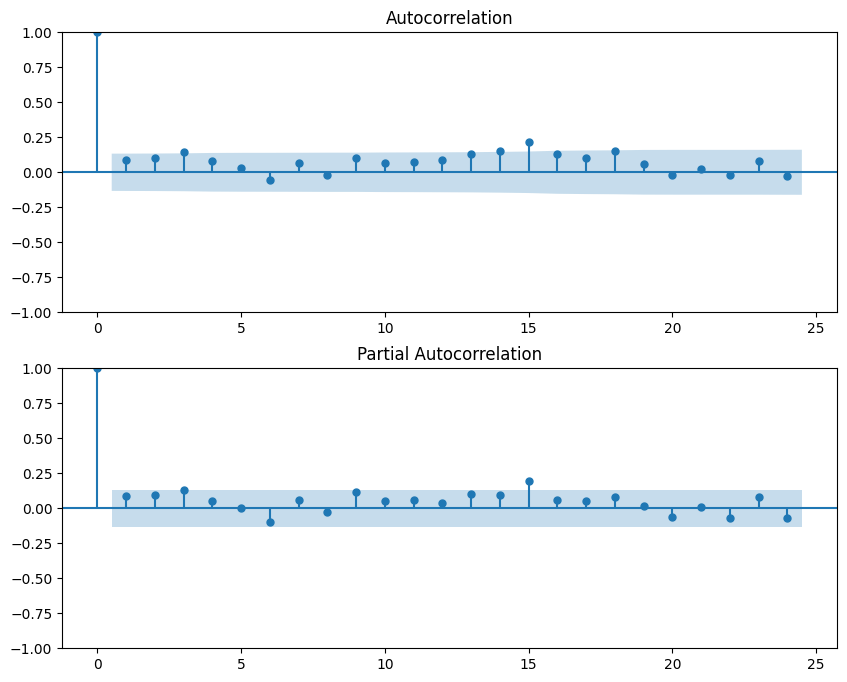

In [30]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


# Plot ACF and PACF  (hanya kolom 'Total Penjualan')
fig, axes = plt.subplots(2, 1, figsize=(10, 8))
plot_acf(data_daily_sales['Total Penjualan'], ax=axes[0])
plot_pacf(data_daily_sales['Total Penjualan'], ax=axes[1])
plt.show()

### Forecasting

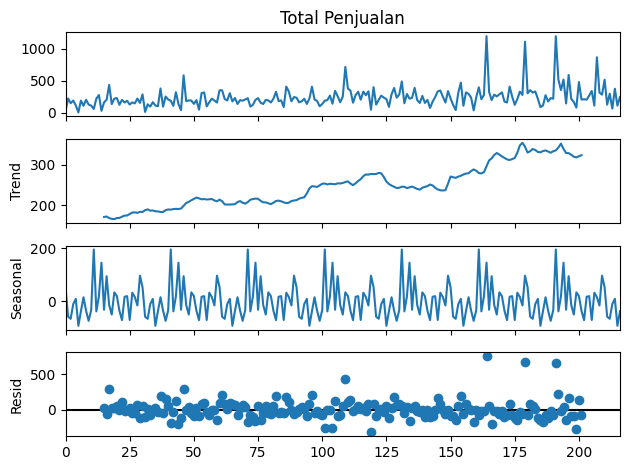

In [31]:
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt

# Dekomposisi
decomposition = seasonal_decompose(data_daily_sales['Total Penjualan'], model='additive', period=30)

# Plot hasil dekomposisi
decomposition.plot()
plt.show()


In [33]:
from statsmodels.tsa.arima.model import ARIMA

# Fit model ARIMA
model = ARIMA(data_daily_sales['Total Penjualan'], order=(1,0,1))  # order (p,d,q)
model_fit = model.fit()

# Ringkasan hasil model
print(model_fit.summary())


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:        Total Penjualan   No. Observations:                  217
Model:                 ARIMA(1, 0, 1)   Log Likelihood               -1404.421
Date:                Mon, 10 Feb 2025   AIC                           2816.843
Time:                        13:32:04   BIC                           2830.362
Sample:                             0   HQIC                          2822.304
                                - 217                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        243.4947     79.630      3.058      0.002      87.422     399.567
ar.L1          0.9927      0.021     47.698      0.000       0.952       1.033
ma.L1         -0.9562      0.052    -18.352      0.0

In [34]:
data_daily_sales

,Tanggal,Total Penjualan
0,2024-01-30,25.0
1,2024-01-31,227.0
2,2024-02-01,152.0
3,2024-02-02,194.0
4,2024-02-03,118.0
...,...,...
212,2024-09-14,301.0
213,2024-09-15,68.0
214,2024-09-16,378.0
215,2024-09-17,114.0


In [35]:
# Memastikan kolom 'Tanggal' dalam format datetime dan atur sebagai indeks
data_daily_sales['Tanggal'] = pd.to_datetime(data_daily_sales['Tanggal'])
data_daily_sales.set_index('Tanggal', inplace=True)

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/pyt

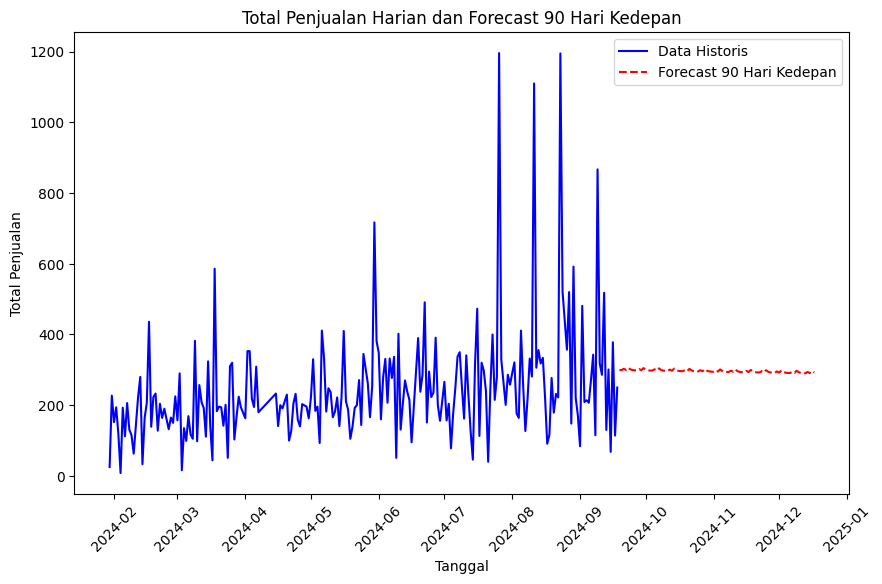

In [36]:
# Fit model SARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
# Menentukan parameter SARIMA: order(p,d,q), seasonal_order(P,D,Q,s)
# order=(1,0,1) artinya ARIMA(1,0,1) dan seasonal_order=(1,0,1,7) untuk komponen musiman mingguan
model = SARIMAX(data_daily_sales['Total Penjualan'], order=(1,0,1), seasonal_order=(1,0,1,7))
model_fit = model.fit()

# 3. Forecast 90 hari ke depan
forecast = model_fit.forecast(steps=90)
future_dates = pd.date_range(start=data_daily_sales.index[-1] + pd.Timedelta(days=1), periods=90, freq='D')

# 4. Buat plot visualisasi
plt.figure(figsize=(10, 6))
plt.plot(data_daily_sales.index, data_daily_sales['Total Penjualan'], label='Data Historis', color='blue')
plt.plot(future_dates, forecast, label='Forecast 90 Hari Kedepan', color='red', linestyle='--')
plt.title('Total Penjualan Harian dan Forecast 90 Hari Kedepan')
plt.xlabel('Tanggal')
plt.ylabel('Total Penjualan')
plt.xticks(rotation=45)
plt.legend()
plt.show()

### RMSE

In [38]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Asumsikan 'actual_sales' adalah data penjualan aktual selama 90 hari ke depan
actual_sales = data_daily_sales['Total Penjualan'].iloc[-90:]  # Data aktual dari hari ke-91 hingga hari ke-180

# Prediksi 90 hari ke depan (yang sudah ada dari langkah sebelumnya)
predicted_sales = forecast

# Hitung MSE dan RMSE
mse = mean_squared_error(actual_sales, predicted_sales)
rmse = np.sqrt(mse)

print('RMSE 90 hari kedepan:', rmse)


RMSE 90 hari kedepan: 206.83016054643954


 nilai RMSE yang lebih besar menunjukkan model kurang akurat

## Algoritma Apriori

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19303 entries, 0 to 19312
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   ID           19303 non-null  float64       
 1   Tanggal      19303 non-null  datetime64[ns]
 2   Trans ID     19303 non-null  object        
 3   Konsumen     19303 non-null  int64         
 4   Nama Produk  19303 non-null  object        
 5   Kategori     19303 non-null  float64       
 6   Qty          19303 non-null  float64       
 7   year         19303 non-null  int32         
 8   month        19303 non-null  int32         
 9   day          19303 non-null  object        
 10  hour         19303 non-null  int32         
 11  minute       19303 non-null  int32         
 12  second       19303 non-null  int32         
dtypes: datetime64[ns](1), float64(3), int32(5), int64(1), object(3)
memory usage: 1.7+ MB


In [ ]:
unique = data['Kategori'].unique()
unique

array([1217., 1228., 1207., 1223., 1222., 1226., 1211., 1209., 1212.,
       1225., 1210., 1208., 1224., 1218., 1213., 1227., 1216., 1214.,
       1220., 1321., 1219.])

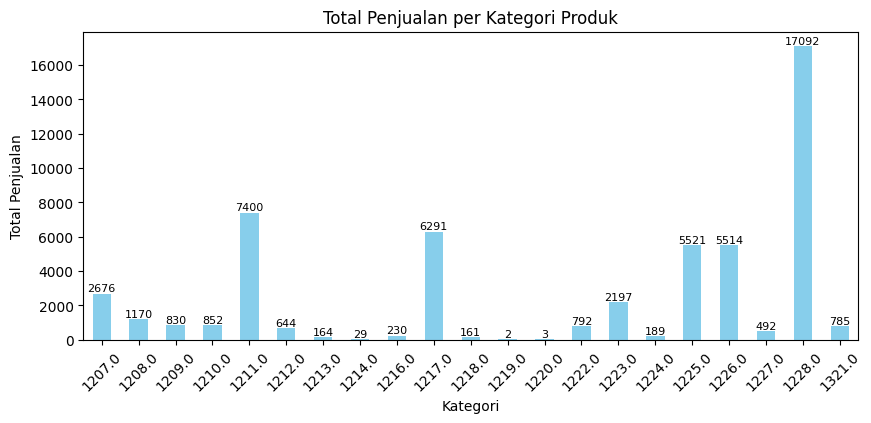

In [ ]:
# Total penjualan per kategori
sales_by_category = data.groupby('Kategori')['Qty'].sum()

# Bar chart
sales_by_category.plot(kind='bar', figsize=(10, 4), color='skyblue')

# Tambahkan label pada setiap batang
for i, v in enumerate(sales_by_category):
    plt.text(i, v, int(v), ha='center', va='bottom', fontsize=8)

plt.title('Total Penjualan per Kategori Produk')
plt.xlabel('Kategori')
plt.ylabel('Total Penjualan')
plt.xticks(rotation=45)
plt.show()

### **Kategori 1207**

In [ ]:
kategori_1207 = (data[data['Kategori']== 1207].groupby(['Trans ID', 'Nama Produk'])['Qty'].sum().unstack().reset_index().fillna(0).set_index('Trans ID'))
kategori_1207.head(3)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Nama Produk,10000.0,10001.0,10005.0,10007.0,10009.0,10013.0,10014.0,10015.0,10017.0,10025.0,...,9973.0,9979.0,9981.0,9982.0,9983.0,9991.0,9996.0,9997.0,9998.0,9999.0
Trans ID,,,,,,,,,,,,,,,,,,,,,
TR-240130-4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TR-240131-13,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TR-240131-14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
def hot_encode(x):
    if(x<= 0): #jika yang dibeli lebih dari atau sama dengan 0 maka ditulis 0 (tidak dibeli)
        return 0
    if(x>= 1): #jika yang dibeli lebih dari atau sama dengan 1 maka ditulis 1 (dibeli)
        return 1
encoded_1207 = kategori_1207.applymap(hot_encode)
kategori_1207 = encoded_1207
encoded_1207.head(3)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-199-06e3dc69a278>:6: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  encoded_1207 = kategori_1207.applymap(hot_encode)


Nama Produk,10000.0,10001.0,10005.0,10007.0,10009.0,10013.0,10014.0,10015.0,10017.0,10025.0,...,9973.0,9979.0,9981.0,9982.0,9983.0,9991.0,9996.0,9997.0,9998.0,9999.0
Trans ID,,,,,,,,,,,,,,,,,,,,,
TR-240130-4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TR-240131-13,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TR-240131-14,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Membangun Model
from mlxtend.frequent_patterns import apriori, association_rules

print("Hasil Analisis Apriori pada Kategori 1207")
frq_items = apriori(encoded_1207, min_support = 0.004, use_colnames = True)

# Mengumpulkan aturan yang disimpulkan dalam dataframe
rules = association_rules(frq_items, metric ="lift", min_threshold = 1)
# Sorting berdasarkan confidence dan lift rasio yang paling tinggi (nanti paling atas adalah rule paling kuat)
rules = rules.sort_values(['confidence', 'lift'], ascending = [False, False])

rules

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


Hasil Analisis Apriori pada Kategori 1207


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(10242.0),(10050.0),0.034868,0.039749,0.010460,0.300000,7.547368,0.009074,1.371787,0.898844
1,(10050.0),(10242.0),0.039749,0.034868,0.010460,0.263158,7.547368,0.009074,1.309823,0.903413
3,(10051.0),(10249.0),0.028591,0.044630,0.004881,0.170732,3.825457,0.003605,1.152063,0.760332
5,(9474.0),(9478.0),0.035565,0.050209,0.004881,0.137255,2.733660,0.003096,1.100894,0.657577
6,(9475.0),(9657.0),0.038354,0.065551,0.004881,0.127273,1.941586,0.002367,1.070723,0.504299
11,(9479.0),(9657.0),0.041144,0.065551,0.004881,0.118644,1.809953,0.002184,1.060240,0.466701
2,(10249.0),(10051.0),0.044630,0.028591,0.004881,0.109375,3.825457,0.003605,1.090704,0.773097
4,(9478.0),(9474.0),0.050209,0.035565,0.004881,0.097222,2.733660,0.003096,1.068297,0.667716
9,(9478.0),(9656.0),0.050209,0.055091,0.004184,0.083333,1.512658,0.001418,1.030810,0.356828
8,(9656.0),(9478.0),0.055091,0.050209,0.004184,0.075949,1.512658,0.001418,1.027856,0.358672


### **Kategori 1208**

In [ ]:
kategori_1208 = (data[data['Kategori']== 1208].groupby(['Trans ID', 'Nama Produk'])['Qty'].sum().unstack().reset_index().fillna(0).set_index('Trans ID'))
kategori_1208.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Nama Produk,10505.0,10507.0,10508.0,10509.0,10510.0,10511.0,10512.0,10513.0,10514.0,10515.0,10516.0,10517.0,10518.0,10519.0,10521.0,10522.0,12247.0,12367.0,12445.0
Trans ID,,,,,,,,,,,,,,,,,,,
TR-240131-13,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TR-240131-18,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TR-240131-21,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TR-240131-24,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TR-240131-29,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
def hot_encode(x):
    if(x<= 0): #jika yang dibeli lebih dari atau sama dengan 0 maka ditulis 0 (tidak dibeli)
        return 0
    if(x>= 1): #jika yang dibeli lebih dari atau sama dengan 1 maka ditulis 1 (dibeli)
        return 1
encoded_1208 = kategori_1208.applymap(hot_encode)
kategori_1208 = encoded_1208
encoded_1208.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-207-a2e342ddd525>:6: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  encoded_1208 = kategori_1208.applymap(hot_encode)


Nama Produk,10505.0,10507.0,10508.0,10509.0,10510.0,10511.0,10512.0,10513.0,10514.0,10515.0,10516.0,10517.0,10518.0,10519.0,10521.0,10522.0,12247.0,12367.0,12445.0
Trans ID,,,,,,,,,,,,,,,,,,,
TR-240131-13,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
TR-240131-18,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
TR-240131-21,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
TR-240131-24,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
TR-240131-29,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Membangun Model
from mlxtend.frequent_patterns import apriori, association_rules

print("Hasil Analisis Apriori pada Kategori 1208")
frq_items = apriori(encoded_1208, min_support = 0.001, use_colnames = True)

# Mengumpulkan aturan yang disimpulkan dalam dataframe
rules = association_rules(frq_items, metric ="lift", min_threshold = 1)
# Sorting berdasarkan confidence dan lift rasio yang paling tinggi (nanti paling atas adalah rule paling kuat)
rules = rules.sort_values(['confidence', 'lift'], ascending = [False, False])

rules

Hasil Analisis Apriori pada Kategori 1208


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
14,"(10507.0, 10515.0)",(12247.0),0.001499,0.032984,0.001499,1.000000,30.318182,0.001450,inf,0.968468
3,(10517.0),(10507.0),0.001499,0.256372,0.001499,1.000000,3.900585,0.001115,inf,0.744745
13,"(12247.0, 10515.0)",(10507.0),0.001499,0.256372,0.001499,1.000000,3.900585,0.001115,inf,0.744745
12,"(12247.0, 10507.0)",(10515.0),0.004498,0.097451,0.001499,0.333333,3.420513,0.001061,1.353823,0.710843
8,(10518.0),(10510.0),0.023988,0.097451,0.004498,0.187500,1.924038,0.002160,1.110829,0.492063
10,(12367.0),(10510.0),0.008996,0.097451,0.001499,0.166667,1.710256,0.000623,1.083058,0.419062
4,(10512.0),(10509.0),0.010495,0.064468,0.001499,0.142857,2.215947,0.000823,1.091454,0.554545
1,(10522.0),(10505.0),0.020990,0.040480,0.001499,0.071429,1.764550,0.000650,1.033329,0.442573
6,(10522.0),(10509.0),0.020990,0.064468,0.001499,0.071429,1.107973,0.000146,1.007496,0.099541
9,(10510.0),(10518.0),0.097451,0.023988,0.004498,0.046154,1.924038,0.002160,1.023238,0.532115


### **Kategori 1209**

In [ ]:
kategori_1209 = (data[data['Kategori']== 1209].groupby(['Trans ID', 'Nama Produk'])['Qty'].sum().unstack().reset_index().fillna(0).set_index('Trans ID'))
kategori_1209.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Nama Produk,10523.0,10525.0,10526.0,10527.0,10528.0,10529.0,10530.0,10531.0,10532.0,10533.0,...,10545.0,10546.0,10547.0,10548.0,10549.0,10550.0,10551.0,10552.0,10555.0,10556.0
Trans ID,,,,,,,,,,,,,,,,,,,,,
TR-240130-9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TR-240131-11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TR-240131-12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TR-240131-13,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TR-240131-27,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
def hot_encode(x):
    if(x<= 0): #jika yang dibeli lebih dari atau sama dengan 0 maka ditulis 0 (tidak dibeli)
        return 0
    if(x>= 1): #jika yang dibeli lebih dari atau sama dengan 1 maka ditulis 1 (dibeli)
        return 1
encoded_1209 = kategori_1209.applymap(hot_encode)
kategori_1209 = encoded_1209
encoded_1209.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-213-d8804cc30a84>:6: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  encoded_1209 = kategori_1209.applymap(hot_encode)


Nama Produk,10523.0,10525.0,10526.0,10527.0,10528.0,10529.0,10530.0,10531.0,10532.0,10533.0,...,10545.0,10546.0,10547.0,10548.0,10549.0,10550.0,10551.0,10552.0,10555.0,10556.0
Trans ID,,,,,,,,,,,,,,,,,,,,,
TR-240130-9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TR-240131-11,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TR-240131-12,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TR-240131-13,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TR-240131-27,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Membangun Model
from mlxtend.frequent_patterns import apriori, association_rules

print("Hasil Analisis Apriori pada Kategori 1209")
frq_items = apriori(encoded_1209, min_support = 0.001, use_colnames = True)

# Mengumpulkan aturan yang disimpulkan dalam dataframe
rules = association_rules(frq_items, metric ="lift", min_threshold = 1)
# Sorting berdasarkan confidence dan lift rasio yang paling tinggi (nanti paling atas adalah rule paling kuat)
rules = rules.sort_values(['confidence', 'lift'], ascending = [False, False])

rules

Hasil Analisis Apriori pada Kategori 1209


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
10,"(10538.0, 10530.0)",(10531.0),0.001724,0.091379,0.001724,1.000000,10.943396,0.001567,inf,0.910190
12,"(10530.0, 10531.0)",(10538.0),0.001724,0.174138,0.001724,1.000000,5.742574,0.001424,inf,0.827288
11,"(10538.0, 10531.0)",(10530.0),0.003448,0.034483,0.001724,0.500000,14.500000,0.001605,1.931034,0.934256
16,"(10537.0, 10546.0)",(10538.0),0.003448,0.174138,0.001724,0.500000,2.871287,0.001124,1.651724,0.653979
18,"(10546.0, 10538.0)",(10537.0),0.003448,0.227586,0.001724,0.500000,2.196970,0.000939,1.544828,0.546713
7,(10545.0),(10537.0),0.018966,0.227586,0.005172,0.272727,1.198347,0.000856,1.062069,0.168717
17,"(10537.0, 10538.0)",(10546.0),0.006897,0.043103,0.001724,0.250000,5.800000,0.001427,1.275862,0.833333
3,(10543.0),(10529.0),0.008621,0.015517,0.001724,0.200000,12.888889,0.001590,1.230603,0.930435
2,(10529.0),(10543.0),0.015517,0.008621,0.001724,0.111111,12.888889,0.001590,1.115302,0.936953
8,(10545.0),(10541.0),0.018966,0.081034,0.001724,0.090909,1.121857,0.000187,1.010862,0.110721


### **Kategori 1210**

In [ ]:
kategori_1210 = (data[data['Kategori']== 1210].groupby(['Trans ID', 'Nama Produk'])['Qty'].sum().unstack().reset_index().fillna(0).set_index('Trans ID'))
kategori_1210.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Nama Produk,10557.0,10559.0,10560.0,10561.0,10562.0,10563.0,10564.0,10565.0,10566.0,10567.0,...,10603.0,10604.0,10605.0,10606.0,10607.0,10608.0,12243.0,12317.0,12338.0,12394.0
Trans ID,,,,,,,,,,,,,,,,,,,,,
TR-240131-13,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TR-240131-20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
TR-240131-26,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TR-240201-16,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TR-240201-19,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
def hot_encode(x):
    if(x<= 0): #jika yang dibeli lebih dari atau sama dengan 0 maka ditulis 0 (tidak dibeli)
        return 0
    if(x>= 1): #jika yang dibeli lebih dari atau sama dengan 1 maka ditulis 1 (dibeli)
        return 1
encoded_1210 = kategori_1210.applymap(hot_encode)
kategori_1210 = encoded_1210
encoded_1210.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-217-ab400f6e438d>:6: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  encoded_1210 = kategori_1210.applymap(hot_encode)


Nama Produk,10557.0,10559.0,10560.0,10561.0,10562.0,10563.0,10564.0,10565.0,10566.0,10567.0,...,10603.0,10604.0,10605.0,10606.0,10607.0,10608.0,12243.0,12317.0,12338.0,12394.0
Trans ID,,,,,,,,,,,,,,,,,,,,,
TR-240131-13,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TR-240131-20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
TR-240131-26,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TR-240201-16,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TR-240201-19,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Membangun Model
from mlxtend.frequent_patterns import apriori, association_rules

print("Hasil Analisis Apriori pada Kategori 1210")
frq_items = apriori(encoded_1210, min_support = 0.002, use_colnames = True)

# Mengumpulkan aturan yang disimpulkan dalam dataframe
rules = association_rules(frq_items, metric ="lift", min_threshold = 1)
# Sorting berdasarkan confidence dan lift rasio yang paling tinggi (nanti paling atas adalah rule paling kuat)
rules = rules.sort_values(['confidence', 'lift'], ascending = [False, False])

rules

Hasil Analisis Apriori pada Kategori 1210


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
12,(10598.0),(10597.0),0.006568,0.006568,0.006568,1.000000,152.250000,0.006525,inf,1.000000
13,(10597.0),(10598.0),0.006568,0.006568,0.006568,1.000000,152.250000,0.006525,inf,1.000000
2,(12243.0),(10581.0),0.014778,0.027915,0.003284,0.222222,7.960784,0.002872,1.249824,0.887500
8,(12243.0),(10588.0),0.014778,0.054187,0.003284,0.222222,4.101010,0.002483,1.216045,0.767500
14,(12243.0),(10600.0),0.014778,0.070608,0.003284,0.222222,3.147287,0.002241,1.194933,0.692500
10,(12317.0),(10588.0),0.029557,0.054187,0.004926,0.166667,3.075758,0.003325,1.134975,0.695431
3,(10581.0),(12243.0),0.027915,0.014778,0.003284,0.117647,7.960784,0.002872,1.116585,0.899493
4,(12317.0),(10583.0),0.029557,0.083744,0.003284,0.111111,1.326797,0.000809,1.030788,0.253807
6,(10586.0),(10588.0),0.032841,0.054187,0.003284,0.100000,1.845455,0.001505,1.050903,0.473684
11,(10588.0),(12317.0),0.054187,0.029557,0.004926,0.090909,3.075758,0.003325,1.067488,0.713542


### **Kategori 1211**

In [ ]:
kategori_1211 = (data[data['Kategori']== 1211].groupby(['Trans ID', 'Nama Produk'])['Qty'].sum().unstack().reset_index().fillna(0).set_index('Trans ID'))
kategori_1211.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Nama Produk,10609.0,10610.0,10611.0,10612.0,10613.0,10614.0,10615.0,10616.0,10617.0,10618.0,...,10641.0,10642.0,10643.0,10644.0,12315.0,12395.0,12396.0,12412.0,12413.0,12423.0
Trans ID,,,,,,,,,,,,,,,,,,,,,
TR-240130-11,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TR-240130-9,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TR-240131-12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TR-240131-13,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TR-240131-15,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
def hot_encode(x):
    if(x<= 0): #jika yang dibeli lebih dari atau sama dengan 0 maka ditulis 0 (tidak dibeli)
        return 0
    if(x>= 1): #jika yang dibeli lebih dari atau sama dengan 1 maka ditulis 1 (dibeli)
        return 1
encoded_1211 = kategori_1211.applymap(hot_encode)
kategori_1211 = encoded_1211
encoded_1211.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-234-e3e5a90b4574>:6: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  encoded_1211 = kategori_1211.applymap(hot_encode)


Nama Produk,10609.0,10610.0,10611.0,10612.0,10613.0,10614.0,10615.0,10616.0,10617.0,10618.0,...,10641.0,10642.0,10643.0,10644.0,12315.0,12395.0,12396.0,12412.0,12413.0,12423.0
Trans ID,,,,,,,,,,,,,,,,,,,,,
TR-240130-11,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TR-240130-9,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TR-240131-12,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
TR-240131-13,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TR-240131-15,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Membangun Model
from mlxtend.frequent_patterns import apriori, association_rules

print("Hasil Analisis Apriori pada Kategori 1211")
frq_items = apriori(encoded_1211, min_support = 0.003, use_colnames = True)

# Mengumpulkan aturan yang disimpulkan dalam dataframe
rules = association_rules(frq_items, metric ="lift", min_threshold = 1)
# Sorting berdasarkan confidence dan lift rasio yang paling tinggi (nanti paling atas adalah rule paling kuat)
rules = rules.sort_values(['confidence', 'lift'], ascending = [False, False])

rules

Hasil Analisis Apriori pada Kategori 1211


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
5,(12395.0),(10615.0),0.009354,0.170156,0.003118,0.333333,1.958988,0.001526,1.244766,0.494155
3,(10616.0),(10615.0),0.022272,0.170156,0.006236,0.280000,1.645550,0.002446,1.152561,0.401237
0,(10624.0),(10609.0),0.062361,0.065479,0.005791,0.092857,1.418124,0.001707,1.030181,0.314453
1,(10609.0),(10624.0),0.065479,0.062361,0.005791,0.088435,1.418124,0.001707,1.028604,0.315502
2,(10615.0),(10616.0),0.170156,0.022272,0.006236,0.036649,1.645550,0.002446,1.014924,0.472740
4,(10615.0),(12395.0),0.170156,0.009354,0.003118,0.018325,1.958988,0.001526,1.009138,0.589909


### **Kategori 1212**

In [ ]:
kategori_1212 = (data[data['Kategori']== 1212].groupby(['Trans ID', 'Nama Produk'])['Qty'].sum().unstack().reset_index().fillna(0).set_index('Trans ID'))
kategori_1212.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Nama Produk,10646.0,10650.0,10651.0,10652.0,10653.0,10654.0,10656.0,10657.0,10658.0,10660.0,...,10778.0,10779.0,10781.0,10784.0,10789.0,10790.0,10794.0,10797.0,10802.0,12237.0
Trans ID,,,,,,,,,,,,,,,,,,,,,
TR-240131-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TR-240131-4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TR-240201-12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TR-240201-17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TR-240201-22,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
def hot_encode(x):
    if(x<= 0): #jika yang dibeli lebih dari atau sama dengan 0 maka ditulis 0 (tidak dibeli)
        return 0
    if(x>= 1): #jika yang dibeli lebih dari atau sama dengan 1 maka ditulis 1 (dibeli)
        return 1
encoded_1212 = kategori_1212.applymap(hot_encode)
kategori_1212 = encoded_1212
encoded_1212.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-239-ca27ece4d7fb>:6: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  encoded_1212 = kategori_1212.applymap(hot_encode)


Nama Produk,10646.0,10650.0,10651.0,10652.0,10653.0,10654.0,10656.0,10657.0,10658.0,10660.0,...,10778.0,10779.0,10781.0,10784.0,10789.0,10790.0,10794.0,10797.0,10802.0,12237.0
Trans ID,,,,,,,,,,,,,,,,,,,,,
TR-240131-1,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
TR-240131-4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TR-240201-12,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TR-240201-17,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TR-240201-22,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Membangun Model
from mlxtend.frequent_patterns import apriori, association_rules

print("Hasil Analisis Apriori pada Kategori 1212")
frq_items = apriori(encoded_1212, min_support = 0.005, use_colnames = True)

# Mengumpulkan aturan yang disimpulkan dalam dataframe
rules = association_rules(frq_items, metric ="lift", min_threshold = 1)
# Sorting berdasarkan confidence dan lift rasio yang paling tinggi (nanti paling atas adalah rule paling kuat)
rules = rules.sort_values(['confidence', 'lift'], ascending = [False, False])

rules

Hasil Analisis Apriori pada Kategori 1212


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
3,(10755.0),(10663.0),0.005208,0.007812,0.005208,1.000000,128.000000,0.005168,inf,0.997382
1,(10656.0),(10662.0),0.005208,0.015625,0.005208,1.000000,64.000000,0.005127,inf,0.989529
2,(10663.0),(10755.0),0.007812,0.005208,0.005208,0.666667,128.000000,0.005168,2.984375,1.000000
5,(10713.0),(10667.0),0.007812,0.036458,0.005208,0.666667,18.285714,0.004924,2.890625,0.952756
9,(10781.0),(10730.0),0.013021,0.067708,0.007812,0.600000,8.861538,0.006931,2.330729,0.898857
0,(10662.0),(10656.0),0.015625,0.005208,0.005208,0.333333,64.000000,0.005127,1.492187,1.000000
10,(10802.0),(10797.0),0.023438,0.023438,0.005208,0.222222,9.481481,0.004659,1.255580,0.916000
11,(10797.0),(10802.0),0.023438,0.023438,0.005208,0.222222,9.481481,0.004659,1.255580,0.916000
7,(10674.0),(10684.0),0.023438,0.106771,0.005208,0.222222,2.081301,0.002706,1.148438,0.532000
4,(10667.0),(10713.0),0.036458,0.007812,0.005208,0.142857,18.285714,0.004924,1.157552,0.981081


### **Kategori 1213**

In [ ]:
kategori_1213 = (data[data['Kategori']== 1213].groupby(['Trans ID', 'Nama Produk'])['Qty'].sum().unstack().reset_index().fillna(0).set_index('Trans ID'))
kategori_1213.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Nama Produk,10812.0,10813.0,10814.0,10815.0,10825.0,10829.0,10830.0,10831.0,10833.0,10834.0,...,10846.0,10847.0,10848.0,10849.0,10850.0,11685.0,11686.0,11687.0,11688.0,12371.0
Trans ID,,,,,,,,,,,,,,,,,,,,,
TR-240131-27,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
TR-240131-29,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
TR-240201-18,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
TR-240201-7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TR-240203-3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0


In [ ]:
def hot_encode(x):
    if(x<= 0): #jika yang dibeli lebih dari atau sama dengan 0 maka ditulis 0 (tidak dibeli)
        return 0
    if(x>= 1): #jika yang dibeli lebih dari atau sama dengan 1 maka ditulis 1 (dibeli)
        return 1
encoded_1213 = kategori_1213.applymap(hot_encode)
kategori_1213 = encoded_1213
encoded_1213.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-246-dfd0096f82c9>:6: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  encoded_1213 = kategori_1213.applymap(hot_encode)


Nama Produk,10812.0,10813.0,10814.0,10815.0,10825.0,10829.0,10830.0,10831.0,10833.0,10834.0,...,10846.0,10847.0,10848.0,10849.0,10850.0,11685.0,11686.0,11687.0,11688.0,12371.0
Trans ID,,,,,,,,,,,,,,,,,,,,,
TR-240131-27,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
TR-240131-29,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
TR-240201-18,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
TR-240201-7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TR-240203-3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
# Membangun Model
from mlxtend.frequent_patterns import apriori, association_rules

print("Hasil Analisis Apriori pada Kategori 1213")
frq_items = apriori(encoded_1213, min_support = 0.001, use_colnames = True)

# Mengumpulkan aturan yang disimpulkan dalam dataframe
rules = association_rules(frq_items, metric ="lift", min_threshold = 1)
# Sorting berdasarkan confidence dan lift rasio yang paling tinggi (nanti paling atas adalah rule paling kuat)
rules = rules.sort_values(['confidence', 'lift'], ascending = [False, False])

rules

Hasil Analisis Apriori pada Kategori 1213


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(10829.0),(10825.0),0.024793,0.033058,0.008264,0.333333,10.083333,0.007445,1.450413,0.923729
1,(10825.0),(10829.0),0.033058,0.024793,0.008264,0.250000,10.083333,0.007445,1.300275,0.931624


### **Kategori 1214** (min support 50%)

In [ ]:
kategori_1214 = (data[data['Kategori']== 1214].groupby(['Trans ID', 'Nama Produk'])['Qty'].sum().unstack().reset_index().fillna(0).set_index('Trans ID'))
kategori_1214.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Nama Produk,10851.0,10894.0,10895.0,10896.0,10898.0,10899.0,10900.0,10902.0,12285.0
Trans ID,,,,,,,,,
TR-240205-42,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0
TR-240206-24,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
TR-240215-2,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0
TR-240329-27,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
TR-240402-56,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
def hot_encode(x):
    if(x<= 0): #jika yang dibeli lebih dari atau sama dengan 0 maka ditulis 0 (tidak dibeli)
        return 0
    if(x>= 1): #jika yang dibeli lebih dari atau sama dengan 1 maka ditulis 1 (dibeli)
        return 1
encoded_1214 = kategori_1214.applymap(hot_encode)
kategori_1214 = encoded_1214
encoded_1214.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-254-43fa11a04be6>:6: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  encoded_1214 = kategori_1214.applymap(hot_encode)


Nama Produk,10851.0,10894.0,10895.0,10896.0,10898.0,10899.0,10900.0,10902.0,12285.0
Trans ID,,,,,,,,,
TR-240205-42,0,0,1,0,0,0,0,0,0
TR-240206-24,0,0,1,0,0,0,0,0,0
TR-240215-2,0,0,0,0,1,0,0,0,0
TR-240329-27,0,0,0,0,0,1,0,0,0
TR-240402-56,0,0,1,0,0,0,0,0,0


In [ ]:
# Membangun Model
from mlxtend.frequent_patterns import apriori, association_rules

print("Hasil Analisis Apriori pada Kategori 1214")
frq_items = apriori(encoded_1214, min_support = 0.05, use_colnames = True)

# Mengumpulkan aturan yang disimpulkan dalam dataframe
rules = association_rules(frq_items, metric ="lift", min_threshold = 1)
# Sorting berdasarkan confidence dan lift rasio yang paling tinggi (nanti paling atas adalah rule paling kuat)
rules = rules.sort_values(['confidence', 'lift'], ascending = [False, False])

rules

Hasil Analisis Apriori pada Kategori 1214


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(10899.0),(10902.0),0.105263,0.263158,0.052632,0.5,1.9,0.024931,1.473684,0.529412
3,(10900.0),(10902.0),0.210526,0.263158,0.105263,0.5,1.9,0.049861,1.473684,0.600000
2,(10902.0),(10900.0),0.263158,0.210526,0.105263,0.4,1.9,0.049861,1.315789,0.642857
1,(10902.0),(10899.0),0.263158,0.105263,0.052632,0.2,1.9,0.024931,1.118421,0.642857


### **Kategori 1216** (min support 10%)

In [ ]:
kategori_1216 = (data[data['Kategori']== 1216].groupby(['Trans ID', 'Nama Produk'])['Qty'].sum().unstack().reset_index().fillna(0).set_index('Trans ID'))
kategori_1216.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Nama Produk,10856.0,10857.0,10858.0,10859.0,10862.0,10864.0,10865.0,10866.0,10867.0,10868.0,...,10880.0,10885.0,10886.0,10887.0,10888.0,10890.0,10892.0,10893.0,12337.0,12444.0
Trans ID,,,,,,,,,,,,,,,,,,,,,
TR-240205-27,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TR-240208-31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
TR-240209-18,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TR-240212-28,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TR-240212-3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
def hot_encode(x):
    if(x<= 0): #jika yang dibeli lebih dari atau sama dengan 0 maka ditulis 0 (tidak dibeli)
        return 0
    if(x>= 1): #jika yang dibeli lebih dari atau sama dengan 1 maka ditulis 1 (dibeli)
        return 1
encoded_1216 = kategori_1216.applymap(hot_encode)
kategori_1216 = encoded_1216
encoded_1216.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-262-3bcd952e5b10>:6: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  encoded_1216 = kategori_1216.applymap(hot_encode)


Nama Produk,10856.0,10857.0,10858.0,10859.0,10862.0,10864.0,10865.0,10866.0,10867.0,10868.0,...,10880.0,10885.0,10886.0,10887.0,10888.0,10890.0,10892.0,10893.0,12337.0,12444.0
Trans ID,,,,,,,,,,,,,,,,,,,,,
TR-240205-27,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TR-240208-31,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
TR-240209-18,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
TR-240212-28,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TR-240212-3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Membangun Model
from mlxtend.frequent_patterns import apriori, association_rules

print("Hasil Analisis Apriori pada Kategori 1216")
frq_items = apriori(encoded_1216, min_support = 0.01, use_colnames = True)

# Mengumpulkan aturan yang disimpulkan dalam dataframe
rules = association_rules(frq_items, metric ="lift", min_threshold = 1)
# Sorting berdasarkan confidence dan lift rasio yang paling tinggi (nanti paling atas adalah rule paling kuat)
rules = rules.sort_values(['confidence', 'lift'], ascending = [False, False])

rules

Hasil Analisis Apriori pada Kategori 1216


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
7,(10869.0),(10870.0),0.014706,0.088235,0.014706,1.000000,11.333333,0.013408,inf,0.925373
14,(10886.0),(10887.0),0.022059,0.022059,0.014706,0.666667,30.222222,0.014219,2.933824,0.988722
15,(10887.0),(10886.0),0.022059,0.022059,0.014706,0.666667,30.222222,0.014219,2.933824,0.988722
9,(10873.0),(10870.0),0.036765,0.088235,0.014706,0.400000,4.533333,0.011462,1.519608,0.809160
10,(10878.0),(10876.0),0.044118,0.044118,0.014706,0.333333,7.555556,0.012760,1.433824,0.907692
11,(10876.0),(10878.0),0.044118,0.044118,0.014706,0.333333,7.555556,0.012760,1.433824,0.907692
13,(10878.0),(10880.0),0.044118,0.110294,0.014706,0.333333,3.022222,0.009840,1.334559,0.700000
3,(10874.0),(10864.0),0.044118,0.183824,0.014706,0.333333,1.813333,0.006596,1.224265,0.469231
5,(10874.0),(10865.0),0.044118,0.183824,0.014706,0.333333,1.813333,0.006596,1.224265,0.469231
0,(10865.0),(10864.0),0.183824,0.183824,0.036765,0.200000,1.088000,0.002974,1.020221,0.099099


### **Kategori 1217**

In [ ]:
kategori_1217 = (data[data['Kategori']== 1217].groupby(['Trans ID', 'Nama Produk'])['Qty'].sum().unstack().reset_index().fillna(0).set_index('Trans ID'))
kategori_1217.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Nama Produk,10908.0,10910.0,10918.0,10926.0,10929.0,10932.0,10934.0,10936.0,10947.0,10949.0,...,11500.0,11501.0,11502.0,11503.0,11504.0,11505.0,11507.0,11508.0,12265.0,12400.0
Trans ID,,,,,,,,,,,,,,,,,,,,,
TR-240130-2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TR-240130-7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TR-240131-10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TR-240131-16,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TR-240131-19,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
def hot_encode(x):
    if(x<= 0): #jika yang dibeli lebih dari atau sama dengan 0 maka ditulis 0 (tidak dibeli)
        return 0
    if(x>= 1): #jika yang dibeli lebih dari atau sama dengan 1 maka ditulis 1 (dibeli)
        return 1
encoded_1217 = kategori_1217.applymap(hot_encode)
kategori_1217 = encoded_1217
encoded_1217.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-272-66c78177829b>:6: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  encoded_1217 = kategori_1217.applymap(hot_encode)


Nama Produk,10908.0,10910.0,10918.0,10926.0,10929.0,10932.0,10934.0,10936.0,10947.0,10949.0,...,11500.0,11501.0,11502.0,11503.0,11504.0,11505.0,11507.0,11508.0,12265.0,12400.0
Trans ID,,,,,,,,,,,,,,,,,,,,,
TR-240130-2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TR-240130-7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TR-240131-10,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TR-240131-16,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TR-240131-19,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Membangun Model
from mlxtend.frequent_patterns import apriori, association_rules

print("Hasil Analisis Apriori pada Kategori 1217")
frq_items = apriori(encoded_1217, min_support = 0.01, use_colnames = True)

# Mengumpulkan aturan yang disimpulkan dalam dataframe
rules = association_rules(frq_items, metric ="lift", min_threshold = 1)
# Sorting berdasarkan confidence dan lift rasio yang paling tinggi (nanti paling atas adalah rule paling kuat)
rules = rules.sort_values(['confidence', 'lift'], ascending = [False, False])

rules

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


Hasil Analisis Apriori pada Kategori 1217


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
9,"(11237.0, 11233.0)",(11234.0),0.018460,0.113119,0.012962,0.702128,6.207004,0.010873,2.977387,0.854669
1,(11233.0),(11234.0),0.062844,0.113119,0.032993,0.525000,4.641146,0.025884,1.867119,0.837145
8,"(11237.0, 11234.0)",(11233.0),0.026709,0.062844,0.012962,0.485294,7.722243,0.011283,1.820761,0.894392
4,(11237.0),(11234.0),0.067164,0.113119,0.026709,0.397661,3.515432,0.019111,1.472395,0.767059
10,"(11234.0, 11233.0)",(11237.0),0.032993,0.067164,0.012962,0.392857,5.849206,0.010746,1.536435,0.857322
7,(11498.0),(11234.0),0.045562,0.113119,0.016889,0.370690,3.277000,0.011735,1.409291,0.728012
3,(11233.0),(11237.0),0.062844,0.067164,0.018460,0.293750,4.373611,0.014239,1.320829,0.823081
0,(11234.0),(11233.0),0.113119,0.062844,0.032993,0.291667,4.641146,0.025884,1.323044,0.884601
2,(11237.0),(11233.0),0.067164,0.062844,0.018460,0.274854,4.373611,0.014239,1.292369,0.826894
5,(11234.0),(11237.0),0.113119,0.067164,0.026709,0.236111,3.515432,0.019111,1.221167,0.806805


### **Kategori 1218**

In [ ]:
kategori_1218 = (data[data['Kategori']== 1218].groupby(['Trans ID', 'Nama Produk'])['Qty'].sum().unstack().reset_index().fillna(0).set_index('Trans ID'))
kategori_1218.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Nama Produk,11510.0,11511.0,11512.0,11515.0,11533.0,11539.0,11542.0,11549.0,11550.0,11551.0,...,12255.0,12267.0,12269.0,12290.0,12291.0,12292.0,12293.0,12313.0,12399.0,12441.0
Trans ID,,,,,,,,,,,,,,,,,,,,,
TR-240131-24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TR-240201-15,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TR-240202-16,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TR-240203-8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TR-240207-1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
def hot_encode(x):
    if(x<= 0): #jika yang dibeli lebih dari atau sama dengan 0 maka ditulis 0 (tidak dibeli)
        return 0
    if(x>= 1): #jika yang dibeli lebih dari atau sama dengan 1 maka ditulis 1 (dibeli)
        return 1
encoded_1218 = kategori_1218.applymap(hot_encode)
kategori_1218 = encoded_1218
encoded_1218.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-277-d42b0c6c5fd4>:6: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  encoded_1218 = kategori_1218.applymap(hot_encode)


Nama Produk,11510.0,11511.0,11512.0,11515.0,11533.0,11539.0,11542.0,11549.0,11550.0,11551.0,...,12255.0,12267.0,12269.0,12290.0,12291.0,12292.0,12293.0,12313.0,12399.0,12441.0
Trans ID,,,,,,,,,,,,,,,,,,,,,
TR-240131-24,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TR-240201-15,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TR-240202-16,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TR-240203-8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TR-240207-1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Membangun Model
from mlxtend.frequent_patterns import apriori, association_rules

print("Hasil Analisis Apriori pada Kategori 1218")
frq_items = apriori(encoded_1218, min_support = 0.008, use_colnames = True)

# Mengumpulkan aturan yang disimpulkan dalam dataframe
rules = association_rules(frq_items, metric ="lift", min_threshold = 1)
# Sorting berdasarkan confidence dan lift rasio yang paling tinggi (nanti paling atas adalah rule paling kuat)
rules = rules.sort_values(['confidence', 'lift'], ascending = [False, False])

rules

Hasil Analisis Apriori pada Kategori 1218


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(11556.0),(11551.0),0.008621,0.008621,0.008621,1.000000,116.000000,0.008546,inf,1.000000
1,(11551.0),(11556.0),0.008621,0.008621,0.008621,1.000000,116.000000,0.008546,inf,1.000000
6,(12254.0),(11571.0),0.008621,0.008621,0.008621,1.000000,116.000000,0.008546,inf,1.000000
7,(11571.0),(12254.0),0.008621,0.008621,0.008621,1.000000,116.000000,0.008546,inf,1.000000
37,"(12254.0, 11590.0)",(11571.0),0.008621,0.008621,0.008621,1.000000,116.000000,0.008546,inf,1.000000
...,...,...,...,...,...,...,...,...,...,...
19,(11589.0),(11591.0),0.086207,0.008621,0.008621,0.100000,11.600000,0.007878,1.101533,1.000000
3,(11589.0),(11565.0),0.086207,0.025862,0.008621,0.100000,3.866667,0.006391,1.082375,0.811321
13,(11589.0),(11577.0),0.086207,0.025862,0.008621,0.100000,3.866667,0.006391,1.082375,0.811321
14,(11588.0),(11587.0),0.146552,0.017241,0.008621,0.058824,3.411765,0.006094,1.044181,0.828283


### **Kategori 1219**

In [ ]:
kategori_1219 = (data[data['Kategori']== 1219].groupby(['Trans ID', 'Nama Produk'])['Qty'].sum().unstack().reset_index().fillna(0).set_index('Trans ID'))
kategori_1219.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Nama Produk,11599.0
Trans ID,
TR-240827-14,1.0
TR-240830-4,1.0


In [ ]:
def hot_encode(x):
    if(x<= 0): #jika yang dibeli lebih dari atau sama dengan 0 maka ditulis 0 (tidak dibeli)
        return 0
    if(x>= 1): #jika yang dibeli lebih dari atau sama dengan 1 maka ditulis 1 (dibeli)
        return 1
encoded_1219 = kategori_1219.applymap(hot_encode)
kategori_1219 = encoded_1219
encoded_1219.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-295-5df4362e98b9>:6: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  encoded_1219 = kategori_1219.applymap(hot_encode)


Nama Produk,11599.0
Trans ID,
TR-240827-14,1
TR-240830-4,1


In [ ]:
# Membangun Model
from mlxtend.frequent_patterns import apriori, association_rules

print("Hasil Analisis Apriori pada Kategori 1219")
frq_items = apriori(encoded_1219, min_support = 0.001, use_colnames = True)

# Mengumpulkan aturan yang disimpulkan dalam dataframe
rules = association_rules(frq_items, metric ="lift", min_threshold = 1)
# Sorting berdasarkan confidence dan lift rasio yang paling tinggi (nanti paling atas adalah rule paling kuat)
rules = rules.sort_values(['confidence', 'lift'], ascending = [False, False])

rules

Hasil Analisis Apriori pada Kategori 1219


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric


### **Kategori 1220**

In [ ]:
kategori_1220 = (data[data['Kategori']== 1220].groupby(['Trans ID', 'Nama Produk'])['Qty'].sum().unstack().reset_index().fillna(0).set_index('Trans ID'))
kategori_1220.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Nama Produk,11605.0
Trans ID,
TR-240402-56,1.0
TR-240906-36,2.0


In [ ]:
def hot_encode(x):
    if(x<= 0): #jika yang dibeli lebih dari atau sama dengan 0 maka ditulis 0 (tidak dibeli)
        return 0
    if(x>= 1): #jika yang dibeli lebih dari atau sama dengan 1 maka ditulis 1 (dibeli)
        return 1
encoded_1220 = kategori_1220.applymap(hot_encode)
kategori_1220 = encoded_1220
encoded_1220.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-305-cdde77d9ce76>:6: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  encoded_1220 = kategori_1220.applymap(hot_encode)


Nama Produk,11605.0
Trans ID,
TR-240402-56,1
TR-240906-36,1


In [ ]:
# Membangun Model
from mlxtend.frequent_patterns import apriori, association_rules

print("Hasil Analisis Apriori pada Kategori 1220")
frq_items = apriori(encoded_1220, min_support = 0.001, use_colnames = True)

# Mengumpulkan aturan yang disimpulkan dalam dataframe
rules = association_rules(frq_items, metric ="lift", min_threshold = 1)
# Sorting berdasarkan confidence dan lift rasio yang paling tinggi (nanti paling atas adalah rule paling kuat)
rules = rules.sort_values(['confidence', 'lift'], ascending = [False, False])

rules

Hasil Analisis Apriori pada Kategori 1220


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric


### **Kategori 1222**

In [ ]:
kategori_1222 = (data[data['Kategori']== 1222].groupby(['Trans ID', 'Nama Produk'])['Qty'].sum().unstack().reset_index().fillna(0).set_index('Trans ID'))
kategori_1222.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Nama Produk,11611.0,11613.0,11614.0,11615.0,11616.0,11617.0,11618.0,11620.0,11621.0,11622.0,...,11846.0,11847.0,11848.0,12035.0,12036.0,12055.0,12056.0,12242.0,12268.0,12327.0
Trans ID,,,,,,,,,,,,,,,,,,,,,
TR-240130-7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TR-240131-12,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TR-240131-13,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TR-240131-18,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TR-240131-20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
def hot_encode(x):
    if(x<= 0): #jika yang dibeli lebih dari atau sama dengan 0 maka ditulis 0 (tidak dibeli)
        return 0
    if(x>= 1): #jika yang dibeli lebih dari atau sama dengan 1 maka ditulis 1 (dibeli)
        return 1
encoded_1222 = kategori_1222.applymap(hot_encode)
kategori_1222 = encoded_1222
encoded_1222.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-308-87913e407abd>:6: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  encoded_1222 = kategori_1222.applymap(hot_encode)


Nama Produk,11611.0,11613.0,11614.0,11615.0,11616.0,11617.0,11618.0,11620.0,11621.0,11622.0,...,11846.0,11847.0,11848.0,12035.0,12036.0,12055.0,12056.0,12242.0,12268.0,12327.0
Trans ID,,,,,,,,,,,,,,,,,,,,,
TR-240130-7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TR-240131-12,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TR-240131-13,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
TR-240131-18,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TR-240131-20,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Membangun Model
from mlxtend.frequent_patterns import apriori, association_rules

print("Hasil Analisis Apriori pada Kategori 1222")
frq_items = apriori(encoded_1222, min_support = 0.01, use_colnames = True)

# Mengumpulkan aturan yang disimpulkan dalam dataframe
rules = association_rules(frq_items, metric ="lift", min_threshold = 1)
# Sorting berdasarkan confidence dan lift rasio yang paling tinggi (nanti paling atas adalah rule paling kuat)
rules = rules.sort_values(['confidence', 'lift'], ascending = [False, False])

rules

Hasil Analisis Apriori pada Kategori 1222


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
3,(11632.0),(11628.0),0.062392,0.086655,0.017331,0.277778,3.205556,0.011924,1.264631,0.733826
2,(11628.0),(11632.0),0.086655,0.062392,0.017331,0.200000,3.205556,0.011924,1.172010,0.753321
1,(11623.0),(11692.0),0.065858,0.150780,0.010399,0.157895,1.047187,0.000469,1.008449,0.048237
0,(11692.0),(11623.0),0.150780,0.065858,0.010399,0.068966,1.047187,0.000469,1.003338,0.053061


### **Kategori 1223**

In [ ]:
kategori_1223 = (data[data['Kategori']== 1223].groupby(['Trans ID', 'Nama Produk'])['Qty'].sum().unstack().reset_index().fillna(0).set_index('Trans ID'))
kategori_1223.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Nama Produk,11652.0,11653.0,11654.0,11655.0,11657.0,11658.0,11659.0,11660.0,11661.0,11662.0,...,11680.0,11681.0,11682.0,11683.0,11684.0,12270.0,12284.0,12314.0,12328.0,12442.0
Trans ID,,,,,,,,,,,,,,,,,,,,,
TR-240130-5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TR-240130-6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TR-240130-9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TR-240131-11,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TR-240131-13,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
def hot_encode(x):
    if(x<= 0): #jika yang dibeli lebih dari atau sama dengan 0 maka ditulis 0 (tidak dibeli)
        return 0
    if(x>= 1): #jika yang dibeli lebih dari atau sama dengan 1 maka ditulis 1 (dibeli)
        return 1
encoded_1223 = kategori_1223.applymap(hot_encode)
kategori_1223 = encoded_1223
encoded_1223.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-312-3d8be48de2bc>:6: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  encoded_1223 = kategori_1223.applymap(hot_encode)


Nama Produk,11652.0,11653.0,11654.0,11655.0,11657.0,11658.0,11659.0,11660.0,11661.0,11662.0,...,11680.0,11681.0,11682.0,11683.0,11684.0,12270.0,12284.0,12314.0,12328.0,12442.0
Trans ID,,,,,,,,,,,,,,,,,,,,,
TR-240130-5,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
TR-240130-6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TR-240130-9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TR-240131-11,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TR-240131-13,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Membangun Model
from mlxtend.frequent_patterns import apriori, association_rules

print("Hasil Analisis Apriori pada Kategori 1223")
frq_items = apriori(encoded_1223, min_support = 0.003, use_colnames = True)

# Mengumpulkan aturan yang disimpulkan dalam dataframe
rules = association_rules(frq_items, metric ="lift", min_threshold = 1)
# Sorting berdasarkan confidence dan lift rasio yang paling tinggi (nanti paling atas adalah rule paling kuat)
rules = rules.sort_values(['confidence', 'lift'], ascending = [False, False])

rules

Hasil Analisis Apriori pada Kategori 1223


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
8,(11674.0),(11673.0),0.020580,0.070159,0.009355,0.454545,6.478788,0.007911,1.704708,0.863419
7,(11667.0),(11665.0),0.016838,0.056127,0.006548,0.388889,6.928704,0.005603,1.544519,0.870328
10,(11674.0),(11675.0),0.020580,0.130964,0.003742,0.181818,1.388312,0.001047,1.062156,0.285578
1,(11655.0),(11658.0),0.052385,0.120674,0.007484,0.142857,1.183832,0.001162,1.025881,0.163870
9,(11673.0),(11674.0),0.070159,0.020580,0.009355,0.133333,6.478788,0.007911,1.130100,0.909457
4,(11669.0),(11655.0),0.029935,0.052385,0.003742,0.125000,2.386161,0.002174,1.082988,0.598843
6,(11665.0),(11667.0),0.056127,0.016838,0.006548,0.116667,6.928704,0.005603,1.113013,0.906555
2,(11655.0),(11665.0),0.052385,0.056127,0.004677,0.089286,1.590774,0.001737,1.036409,0.391905
3,(11665.0),(11655.0),0.056127,0.052385,0.004677,0.083333,1.590774,0.001737,1.033761,0.393459
5,(11655.0),(11669.0),0.052385,0.029935,0.003742,0.071429,2.386161,0.002174,1.044686,0.613031


### **Kategori 1224**

In [ ]:
kategori_1224 = (data[data['Kategori']== 1224].groupby(['Trans ID', 'Nama Produk'])['Qty'].sum().unstack().reset_index().fillna(0).set_index('Trans ID'))
kategori_1224.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Nama Produk,11697.0,11698.0,11699.0,11700.0,11701.0,11702.0,11707.0,11720.0,11725.0,11729.0,11970.0,11973.0,11974.0
Trans ID,,,,,,,,,,,,,
TR-240131-15,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TR-240131-23,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TR-240201-13,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TR-240202-26,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TR-240205-1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
def hot_encode(x):
    if(x<= 0): #jika yang dibeli lebih dari atau sama dengan 0 maka ditulis 0 (tidak dibeli)
        return 0
    if(x>= 1): #jika yang dibeli lebih dari atau sama dengan 1 maka ditulis 1 (dibeli)
        return 1
encoded_1224 = kategori_1224.applymap(hot_encode)
kategori_1224 = encoded_1224
encoded_1224.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-318-d23d24d3c75c>:6: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  encoded_1224 = kategori_1224.applymap(hot_encode)


Nama Produk,11697.0,11698.0,11699.0,11700.0,11701.0,11702.0,11707.0,11720.0,11725.0,11729.0,11970.0,11973.0,11974.0
Trans ID,,,,,,,,,,,,,
TR-240131-15,0,0,0,1,0,0,0,0,0,0,0,0,0
TR-240131-23,0,0,0,1,0,1,0,0,0,0,0,0,0
TR-240201-13,0,0,0,0,0,1,0,0,0,0,0,0,0
TR-240202-26,0,1,0,0,0,0,0,0,0,0,0,0,0
TR-240205-1,0,1,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Membangun Model
from mlxtend.frequent_patterns import apriori, association_rules

print("Hasil Analisis Apriori pada Kategori 1224")
frq_items = apriori(encoded_1224, min_support = 0.0001, use_colnames = True)

# Mengumpulkan aturan yang disimpulkan dalam dataframe
rules = association_rules(frq_items, metric ="lift", min_threshold = 1)
# Sorting berdasarkan confidence dan lift rasio yang paling tinggi (nanti paling atas adalah rule paling kuat)
rules = rules.sort_values(['confidence', 'lift'], ascending = [False, False])

rules

Hasil Analisis Apriori pada Kategori 1224


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric


### **Kategori 1225**

In [ ]:
kategori_1225 = (data[data['Kategori']== 1225].groupby(['Trans ID', 'Nama Produk'])['Qty'].sum().unstack().reset_index().fillna(0).set_index('Trans ID'))
kategori_1225.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Nama Produk,11730.0,11731.0,11733.0,11735.0,11736.0,11737.0,11739.0,11740.0,11741.0,11742.0,...,11810.0,11811.0,11812.0,11813.0,11814.0,11815.0,11816.0,11817.0,11818.0,12420.0
Trans ID,,,,,,,,,,,,,,,,,,,,,
TR-240131-13,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TR-240131-14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TR-240131-19,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TR-240131-21,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TR-240131-26,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
def hot_encode(x):
    if(x<= 0): #jika yang dibeli lebih dari atau sama dengan 0 maka ditulis 0 (tidak dibeli)
        return 0
    if(x>= 1): #jika yang dibeli lebih dari atau sama dengan 1 maka ditulis 1 (dibeli)
        return 1
encoded_1225 = kategori_1225.applymap(hot_encode)
kategori_1225 = encoded_1225
encoded_1225.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-324-c1137d13754e>:6: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  encoded_1225 = kategori_1225.applymap(hot_encode)


Nama Produk,11730.0,11731.0,11733.0,11735.0,11736.0,11737.0,11739.0,11740.0,11741.0,11742.0,...,11810.0,11811.0,11812.0,11813.0,11814.0,11815.0,11816.0,11817.0,11818.0,12420.0
Trans ID,,,,,,,,,,,,,,,,,,,,,
TR-240131-13,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
TR-240131-14,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TR-240131-19,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TR-240131-21,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
TR-240131-26,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Membangun Model
from mlxtend.frequent_patterns import apriori, association_rules

print("Hasil Analisis Apriori pada Kategori 1225")
frq_items = apriori(encoded_1225, min_support = 0.04, use_colnames = True)

# Mengumpulkan aturan yang disimpulkan dalam dataframe
rules = association_rules(frq_items, metric ="lift", min_threshold = 1)
# Sorting berdasarkan confidence dan lift rasio yang paling tinggi (nanti paling atas adalah rule paling kuat)
rules = rules.sort_values(['confidence', 'lift'], ascending = [False, False])

rules

Hasil Analisis Apriori pada Kategori 1225


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
9,"(11737.0, 11745.0)",(11741.0),0.049610,0.086464,0.046067,0.928571,10.739461,0.041777,12.789511,0.954225
10,"(11741.0, 11745.0)",(11737.0),0.055989,0.075833,0.046067,0.822785,10.849994,0.041821,5.214944,0.961677
8,"(11737.0, 11741.0)",(11745.0),0.057406,0.095677,0.046067,0.802469,8.387289,0.040574,4.578136,0.934413
0,(11737.0),(11741.0),0.075833,0.086464,0.057406,0.757009,8.755247,0.050849,3.759554,0.958466
1,(11741.0),(11737.0),0.086464,0.075833,0.057406,0.663934,8.755247,0.050849,2.749961,0.969619
2,(11737.0),(11745.0),0.075833,0.095677,0.049610,0.654206,6.837660,0.042355,2.615205,0.923806
6,(11741.0),(11745.0),0.086464,0.095677,0.055989,0.647541,6.768002,0.047716,2.565754,0.932908
11,(11737.0),"(11741.0, 11745.0)",0.075833,0.055989,0.046067,0.607477,10.849994,0.041821,2.404981,0.982327
7,(11745.0),(11741.0),0.095677,0.086464,0.055989,0.585185,6.768002,0.047716,2.202275,0.942413
12,(11741.0),"(11737.0, 11745.0)",0.086464,0.049610,0.046067,0.532787,10.739461,0.041777,2.034168,0.992719


### **Kategori 1226**

In [ ]:
kategori_1226 = (data[data['Kategori']== 1226].groupby(['Trans ID', 'Nama Produk'])['Qty'].sum().unstack().reset_index().fillna(0).set_index('Trans ID'))
kategori_1226.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Nama Produk,11819.0,11820.0,11821.0,11822.0,11823.0,11824.0,11825.0,11826.0,11827.0,11828.0,...,12373.0,12377.0,12407.0,12408.0,12414.0,12417.0,12418.0,12419.0,12437.0,12443.0
Trans ID,,,,,,,,,,,,,,,,,,,,,
TR-240130-8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TR-240131-11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TR-240131-12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TR-240131-13,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TR-240131-2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
def hot_encode(x):
    if(x<= 0): #jika yang dibeli lebih dari atau sama dengan 0 maka ditulis 0 (tidak dibeli)
        return 0
    if(x>= 1): #jika yang dibeli lebih dari atau sama dengan 1 maka ditulis 1 (dibeli)
        return 1
encoded_1226 = kategori_1226.applymap(hot_encode)
kategori_1226 = encoded_1226
encoded_1226.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-332-07ba9cd7f6e1>:6: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  encoded_1226 = kategori_1226.applymap(hot_encode)


Nama Produk,11819.0,11820.0,11821.0,11822.0,11823.0,11824.0,11825.0,11826.0,11827.0,11828.0,...,12373.0,12377.0,12407.0,12408.0,12414.0,12417.0,12418.0,12419.0,12437.0,12443.0
Trans ID,,,,,,,,,,,,,,,,,,,,,
TR-240130-8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TR-240131-11,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TR-240131-12,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TR-240131-13,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TR-240131-2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Membangun Model
from mlxtend.frequent_patterns import apriori, association_rules

print("Hasil Analisis Apriori pada Kategori 1226")
frq_items = apriori(encoded_1226, min_support = 0.003, use_colnames = True)

# Mengumpulkan aturan yang disimpulkan dalam dataframe
rules = association_rules(frq_items, metric ="lift", min_threshold = 1)
# Sorting berdasarkan confidence dan lift rasio yang paling tinggi (nanti paling atas adalah rule paling kuat)
rules = rules.sort_values(['confidence', 'lift'], ascending = [False, False])

rules

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


Hasil Analisis Apriori pada Kategori 1226


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
6,(11910.0),(11924.0),0.015273,0.015273,0.007235,0.473684,31.013850,0.007001,1.870981,0.982766
7,(11924.0),(11910.0),0.015273,0.015273,0.007235,0.473684,31.013850,0.007001,1.870981,0.982766
1,(11819.0),(11820.0),0.069936,0.184084,0.030547,0.436782,2.372735,0.017673,1.448668,0.622049
3,(11861.0),(11855.0),0.011254,0.016077,0.003215,0.285714,17.771429,0.003035,1.377492,0.954472
4,(11910.0),(11907.0),0.015273,0.028939,0.003215,0.210526,7.274854,0.002773,1.230011,0.875918
2,(11855.0),(11861.0),0.016077,0.011254,0.003215,0.200000,17.771429,0.003035,1.235932,0.959150
0,(11820.0),(11819.0),0.184084,0.069936,0.030547,0.165939,2.372735,0.017673,1.115103,0.709074
5,(11907.0),(11910.0),0.028939,0.015273,0.003215,0.111111,7.274854,0.002773,1.107818,0.888245


### **Kategori 1227**

In [ ]:
kategori_1227 = (data[data['Kategori']== 1227].groupby(['Trans ID', 'Nama Produk'])['Qty'].sum().unstack().reset_index().fillna(0).set_index('Trans ID'))
kategori_1227.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Nama Produk,12029.0,12030.0,12031.0,12033.0,12034.0,12037.0,12038.0,12039.0,12040.0,12041.0,...,12053.0,12054.0,12057.0,12058.0,12239.0,12251.0,12261.0,12263.0,12264.0,12278.0
Trans ID,,,,,,,,,,,,,,,,,,,,,
TR-240201-30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TR-240201-31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TR-240205-31,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TR-240207-4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TR-240208-20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
def hot_encode(x):
    if(x<= 0): #jika yang dibeli lebih dari atau sama dengan 0 maka ditulis 0 (tidak dibeli)
        return 0
    if(x>= 1): #jika yang dibeli lebih dari atau sama dengan 1 maka ditulis 1 (dibeli)
        return 1
encoded_1227 = kategori_1227.applymap(hot_encode)
kategori_1227 = encoded_1227
encoded_1227.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-339-96087b230051>:6: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  encoded_1227 = kategori_1227.applymap(hot_encode)


Nama Produk,12029.0,12030.0,12031.0,12033.0,12034.0,12037.0,12038.0,12039.0,12040.0,12041.0,...,12053.0,12054.0,12057.0,12058.0,12239.0,12251.0,12261.0,12263.0,12264.0,12278.0
Trans ID,,,,,,,,,,,,,,,,,,,,,
TR-240201-30,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TR-240201-31,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TR-240205-31,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
TR-240207-4,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
TR-240208-20,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Membangun Model
from mlxtend.frequent_patterns import apriori, association_rules

print("Hasil Analisis Apriori pada Kategori 1227")
frq_items = apriori(encoded_1227, min_support = 0.001, use_colnames = True)

# Mengumpulkan aturan yang disimpulkan dalam dataframe
rules = association_rules(frq_items, metric ="lift", min_threshold = 1)
# Sorting berdasarkan confidence dan lift rasio yang paling tinggi (nanti paling atas adalah rule paling kuat)
rules = rules.sort_values(['confidence', 'lift'], ascending = [False, False])

rules

Hasil Analisis Apriori pada Kategori 1227


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
20,"(12030.0, 12037.0)",(12029.0),0.003497,0.006993,0.003497,1.000000,143.000000,0.003472,inf,0.996491
19,"(12029.0, 12037.0)",(12030.0),0.003497,0.013986,0.003497,1.000000,71.500000,0.003448,inf,0.989474
31,"(12239.0, 12052.0)",(12044.0),0.003497,0.038462,0.003497,1.000000,26.000000,0.003362,inf,0.964912
18,"(12029.0, 12030.0)",(12037.0),0.003497,0.059441,0.003497,1.000000,16.823529,0.003289,inf,0.943860
7,(12038.0),(12040.0),0.003497,0.066434,0.003497,1.000000,15.052632,0.003264,inf,0.936842
25,"(12044.0, 12039.0)",(12052.0),0.003497,0.118881,0.003497,1.000000,8.411765,0.003081,inf,0.884211
30,"(12044.0, 12239.0)",(12052.0),0.003497,0.118881,0.003497,1.000000,8.411765,0.003081,inf,0.884211
21,(12029.0),"(12030.0, 12037.0)",0.006993,0.003497,0.003497,0.500000,143.000000,0.003472,1.993007,1.000000
16,(12264.0),(12263.0),0.006993,0.006993,0.003497,0.500000,71.500000,0.003448,1.986014,0.992958
17,(12263.0),(12264.0),0.006993,0.006993,0.003497,0.500000,71.500000,0.003448,1.986014,0.992958


### **Kategori 1228**

In [ ]:
kategori_1228 = (data[data['Kategori']== 1228].groupby(['Trans ID', 'Nama Produk'])['Qty'].sum().unstack().reset_index().fillna(0).set_index('Trans ID'))
kategori_1228.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Nama Produk,12060.0,12061.0,12062.0,12063.0,12064.0,12065.0,12066.0,12067.0,12068.0,12069.0,...,12297.0,12298.0,12299.0,12310.0,12311.0,12356.0,12357.0,12358.0,12393.0,12404.0
Trans ID,,,,,,,,,,,,,,,,,,,,,
TR-240130-3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TR-240131-11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TR-240131-13,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TR-240131-22,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
TR-240131-23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
def hot_encode(x):
    if(x<= 0): #jika yang dibeli lebih dari atau sama dengan 0 maka ditulis 0 (tidak dibeli)
        return 0
    if(x>= 1): #jika yang dibeli lebih dari atau sama dengan 1 maka ditulis 1 (dibeli)
        return 1
encoded_1228 = kategori_1228.applymap(hot_encode)
kategori_1228 = encoded_1228
encoded_1228.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-347-be6acfab890b>:6: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  encoded_1228 = kategori_1228.applymap(hot_encode)


Nama Produk,12060.0,12061.0,12062.0,12063.0,12064.0,12065.0,12066.0,12067.0,12068.0,12069.0,...,12297.0,12298.0,12299.0,12310.0,12311.0,12356.0,12357.0,12358.0,12393.0,12404.0
Trans ID,,,,,,,,,,,,,,,,,,,,,
TR-240130-3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TR-240131-11,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TR-240131-13,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TR-240131-22,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TR-240131-23,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Membangun Model
from mlxtend.frequent_patterns import apriori, association_rules

print("Hasil Analisis Apriori pada Kategori 1228")
frq_items = apriori(encoded_1228, min_support = 0.01, use_colnames = True)

# Mengumpulkan aturan yang disimpulkan dalam dataframe
rules = association_rules(frq_items, metric ="lift", min_threshold = 1)
# Sorting berdasarkan confidence dan lift rasio yang paling tinggi (nanti paling atas adalah rule paling kuat)
rules = rules.sort_values(['confidence', 'lift'], ascending = [False, False])

rules

Hasil Analisis Apriori pada Kategori 1228


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
2,(12065.0),(12150.0),0.048568,0.102117,0.028643,0.589744,5.775172,0.023683,2.188590,0.869053
6,(12076.0),(12151.0),0.029888,0.085928,0.017435,0.583333,6.788647,0.014866,2.193773,0.878966
4,(12075.0),(12151.0),0.032379,0.085928,0.014944,0.461538,5.371237,0.012162,1.697563,0.841055
8,(12077.0),(12151.0),0.042341,0.085928,0.017435,0.411765,4.791986,0.013796,1.553923,0.826305
12,(12145.0),(12150.0),0.048568,0.102117,0.017435,0.358974,3.515322,0.012475,1.400697,0.752057
10,(12077.0),(12152.0),0.042341,0.058531,0.014944,0.352941,6.030038,0.012466,1.454998,0.871045
0,(12064.0),(12150.0),0.042341,0.102117,0.014944,0.352941,3.456241,0.010620,1.387637,0.742089
3,(12150.0),(12065.0),0.102117,0.048568,0.028643,0.280488,5.775172,0.023683,1.322329,0.920883
11,(12152.0),(12077.0),0.058531,0.042341,0.014944,0.255319,6.030038,0.012466,1.285999,0.886023
7,(12151.0),(12076.0),0.085928,0.029888,0.017435,0.202899,6.788647,0.014866,1.217050,0.932853


### **Kategori 1321**

In [ ]:
kategori_1321 = (data[data['Kategori']== 1321].groupby(['Trans ID', 'Nama Produk'])['Qty'].sum().unstack().reset_index().fillna(0).set_index('Trans ID'))
kategori_1321.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Nama Produk,12340.0,12341.0,12342.0,12343.0,12345.0
Trans ID,,,,,
TR-240531-23,6.0,0.0,0.0,0.0,0.0
TR-240601-18,0.0,3.0,0.0,0.0,0.0
TR-240601-20,0.0,1.0,0.0,0.0,0.0
TR-240601-25,0.0,3.0,0.0,0.0,0.0
TR-240601-28,0.0,7.0,0.0,0.0,0.0


In [ ]:
def hot_encode(x):
    if(x<= 0): #jika yang dibeli lebih dari atau sama dengan 0 maka ditulis 0 (tidak dibeli)
        return 0
    if(x>= 1): #jika yang dibeli lebih dari atau sama dengan 1 maka ditulis 1 (dibeli)
        return 1
encoded_1321 = kategori_1321.applymap(hot_encode)
kategori_1321 = encoded_1321
encoded_1321.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-352-01202da388a6>:6: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  encoded_1321 = kategori_1321.applymap(hot_encode)


Nama Produk,12340.0,12341.0,12342.0,12343.0,12345.0
Trans ID,,,,,
TR-240531-23,1,0,0,0,0
TR-240601-18,0,1,0,0,0
TR-240601-20,0,1,0,0,0
TR-240601-25,0,1,0,0,0
TR-240601-28,0,1,0,0,0


In [ ]:
# Membangun Model
from mlxtend.frequent_patterns import apriori, association_rules

print("Hasil Analisis Apriori pada Kategori 1321")
frq_items = apriori(encoded_1321, min_support = 0.003, use_colnames = True)

# Mengumpulkan aturan yang disimpulkan dalam dataframe
rules = association_rules(frq_items, metric ="lift", min_threshold = 1)
# Sorting berdasarkan confidence dan lift rasio yang paling tinggi (nanti paling atas adalah rule paling kuat)
rules = rules.sort_values(['confidence', 'lift'], ascending = [False, False])

rules

Hasil Analisis Apriori pada Kategori 1321


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
5,"(12345.0, 12343.0)",(12342.0),0.003846,0.007692,0.003846,1.000000,130.000000,0.003817,inf,0.996139
4,"(12345.0, 12342.0)",(12343.0),0.003846,0.019231,0.003846,1.000000,52.000000,0.003772,inf,0.984556
6,"(12342.0, 12343.0)",(12345.0),0.003846,0.850000,0.003846,1.000000,1.176471,0.000577,inf,0.150579
8,(12342.0),"(12345.0, 12343.0)",0.007692,0.003846,0.003846,0.500000,130.000000,0.003817,1.992308,1.000000
2,(12342.0),(12343.0),0.007692,0.019231,0.003846,0.500000,26.000000,0.003698,1.961538,0.968992
1,(12343.0),(12341.0),0.019231,0.138462,0.007692,0.400000,2.888889,0.005030,1.435897,0.666667
9,(12343.0),"(12345.0, 12342.0)",0.019231,0.003846,0.003846,0.200000,52.000000,0.003772,1.245192,1.000000
3,(12343.0),(12342.0),0.019231,0.007692,0.003846,0.200000,26.000000,0.003698,1.240385,0.980392
0,(12341.0),(12343.0),0.138462,0.019231,0.007692,0.055556,2.888889,0.005030,1.038462,0.758929
7,(12345.0),"(12342.0, 12343.0)",0.850000,0.003846,0.003846,0.004525,1.176471,0.000577,1.000682,1.000000
